In [136]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import statsmodels as sm
import matplotlib.pyplot as plt
from string import digits
import warnings
from pandas.plotting import scatter_matrix
import math
warnings.filterwarnings('ignore')

In [137]:
flight=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\data.csv")
flight.head()

,Unnamed: 0,Flight_Name,Dep_Time,Arrival_Time,Source,Destination,Travel_Hour,Flight_Price
0,0,AirAsia,21:20,11:30,New Delhi,Bengaluru,14 h 10 m,"₹ 7,423"
1,1,AirAsia,19:25,11:30,New Delhi,Bengaluru,16 h 05 m,"₹ 7,423"
2,2,Go First,19:45,22:20,New Delhi,Bengaluru,02 h 35 m,"₹ 7,424"
3,3,Go First,18:50,00:30,New Delhi,Bengaluru,05 h 40 m,"₹ 7,424"
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
flight.describe()

,Unnamed: 0
count,255.000000
mean,127.000000
std,73.756356
min,0.000000
25%,63.500000
50%,127.000000
75%,190.500000
max,254.000000


all column are object data as if now we need to convert into meaning full numeric value to do analysis

In [139]:
#convert flight price object into numeric value 
flight['Flight_Price']=flight.Flight_Price.str.strip( ' ₹')

In [140]:
flight['Flight_Price']=flight['Flight_Price'].str.replace(',','')

In [141]:
flight['Flight_Price']=pd.to_numeric(flight.Flight_Price)

In [142]:
flight.head()

,Unnamed: 0,Flight_Name,Dep_Time,Arrival_Time,Source,Destination,Travel_Hour,Flight_Price
0,0,AirAsia,21:20,11:30,New Delhi,Bengaluru,14 h 10 m,7423.0
1,1,AirAsia,19:25,11:30,New Delhi,Bengaluru,16 h 05 m,7423.0
2,2,Go First,19:45,22:20,New Delhi,Bengaluru,02 h 35 m,7424.0
3,3,Go First,18:50,00:30,New Delhi,Bengaluru,05 h 40 m,7424.0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
#drop  Unnamed column
flight.drop(columns='Unnamed: 0',inplace=True)

In [144]:
flight.head()

,Flight_Name,Dep_Time,Arrival_Time,Source,Destination,Travel_Hour,Flight_Price
0,AirAsia,21:20,11:30,New Delhi,Bengaluru,14 h 10 m,7423.0
1,AirAsia,19:25,11:30,New Delhi,Bengaluru,16 h 05 m,7423.0
2,Go First,19:45,22:20,New Delhi,Bengaluru,02 h 35 m,7424.0
3,Go First,18:50,00:30,New Delhi,Bengaluru,05 h 40 m,7424.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
#check NaN value
flight.isna().sum()

Flight_Name     114
Dep_Time        114
Arrival_Time    114
Source          114
Destination     114
Travel_Hour     114
Flight_Price    114
dtype: int64

In [146]:
#Fill NaN values
flight['Flight_Name']=flight['Flight_Name'].fillna(flight['Flight_Name'].mode()[0])
flight['Dep_Time']=flight['Dep_Time'].fillna(flight['Dep_Time'].mode()[0])
flight['Arrival_Time']=flight['Arrival_Time'].fillna(flight['Arrival_Time'].mode()[0])
flight['Source']=flight['Source'].fillna(flight['Source'].mode()[0])
flight['Destination']=flight['Destination'].fillna(flight['Destination'].mode()[0])
flight['Travel_Hour']=flight['Travel_Hour'].fillna(flight['Travel_Hour'].mode()[0])
flight['Flight_Price']=flight['Flight_Price'].fillna(flight['Flight_Price'].mean())

In [147]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Flight_Name   255 non-null    object 
 1   Dep_Time      255 non-null    object 
 2   Arrival_Time  255 non-null    object 
 3   Source        255 non-null    object 
 4   Destination   255 non-null    object 
 5   Travel_Hour   255 non-null    object 
 6   Flight_Price  255 non-null    float64
dtypes: float64(1), object(6)
memory usage: 14.1+ KB


In [148]:
flight.head()

,Flight_Name,Dep_Time,Arrival_Time,Source,Destination,Travel_Hour,Flight_Price
0,AirAsia,21:20,11:30,New Delhi,Bengaluru,14 h 10 m,7423.00000
1,AirAsia,19:25,11:30,New Delhi,Bengaluru,16 h 05 m,7423.00000
2,Go First,19:45,22:20,New Delhi,Bengaluru,02 h 35 m,7424.00000
3,Go First,18:50,00:30,New Delhi,Bengaluru,05 h 40 m,7424.00000
4,IndiGo,05:45,08:20,New Delhi,Bengaluru,02 h 45 m,8105.29078


In [149]:
flight['Dep_Hour']=pd.to_datetime(flight['Dep_Time']).dt.hour
flight['Dep_minute']=pd.to_datetime(flight['Dep_Time']).dt.minute
flight['Arrival_Hour']=pd.to_datetime(flight['Arrival_Time']).dt.hour
flight['Arrival_minute']=pd.to_datetime(flight['Arrival_Time']).dt.minute

In [150]:
flight.head()

,Flight_Name,Dep_Time,Arrival_Time,Source,Destination,Travel_Hour,Flight_Price,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute
0,AirAsia,21:20,11:30,New Delhi,Bengaluru,14 h 10 m,7423.00000,21,20,11,30
1,AirAsia,19:25,11:30,New Delhi,Bengaluru,16 h 05 m,7423.00000,19,25,11,30
2,Go First,19:45,22:20,New Delhi,Bengaluru,02 h 35 m,7424.00000,19,45,22,20
3,Go First,18:50,00:30,New Delhi,Bengaluru,05 h 40 m,7424.00000,18,50,0,30
4,IndiGo,05:45,08:20,New Delhi,Bengaluru,02 h 45 m,8105.29078,5,45,8,20


In [151]:
#convert Duration into hour and minute 
duration=list(flight['Travel_Hour'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2: #check duration only contain hour or minute
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + ' 0m'  #add minute input 
        else:
            duration[i]='0h ' + duration[i].strip()
                
                
duration_hour=[]
duration_minute=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep= 'h')[0]))
    
    duration_minute.append((duration[i].split(sep= 'm')[0].split()[-1]))


In [152]:
#add durtion hour and duration minute
flight['Duration_minute']=duration_minute
flight['Duration_hour']=duration_hour

In [153]:
flight.head()

,Flight_Name,Dep_Time,Arrival_Time,Source,Destination,Travel_Hour,Flight_Price,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_minute,Duration_hour
0,AirAsia,21:20,11:30,New Delhi,Bengaluru,14 h 10 m,7423.00000,21,20,11,30,10,14
1,AirAsia,19:25,11:30,New Delhi,Bengaluru,16 h 05 m,7423.00000,19,25,11,30,05,16
2,Go First,19:45,22:20,New Delhi,Bengaluru,02 h 35 m,7424.00000,19,45,22,20,35,2
3,Go First,18:50,00:30,New Delhi,Bengaluru,05 h 40 m,7424.00000,18,50,0,30,40,5
4,IndiGo,05:45,08:20,New Delhi,Bengaluru,02 h 45 m,8105.29078,5,45,8,20,45,2


In [154]:
#drop Dep_time Arroval_time & Travel _hour column because it replaced alreday 
flight.drop(columns=['Dep_Time','Arrival_Time','Travel_Hour'],axis=1,inplace=True)

In [155]:
flight.head()

,Flight_Name,Source,Destination,Flight_Price,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_minute,Duration_hour
0,AirAsia,New Delhi,Bengaluru,7423.00000,21,20,11,30,10,14
1,AirAsia,New Delhi,Bengaluru,7423.00000,19,25,11,30,05,16
2,Go First,New Delhi,Bengaluru,7424.00000,19,45,22,20,35,2
3,Go First,New Delhi,Bengaluru,7424.00000,18,50,0,30,40,5
4,IndiGo,New Delhi,Bengaluru,8105.29078,5,45,8,20,45,2


In [156]:
#encoding categorical data with label encoding 
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()
for i in flight:
    if flight[i].dtypes=='object':
         flight[i]=ord.fit_transform(flight)

In [157]:
flight.head()

,Flight_Name,Source,Destination,Flight_Price,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_minute,Duration_hour
0,1.0,1.0,1.0,7423.00000,21,20,11,30,1.0,14
1,1.0,1.0,1.0,7423.00000,19,25,11,30,1.0,16
2,2.0,2.0,2.0,7424.00000,19,45,22,20,2.0,2
3,2.0,2.0,2.0,7424.00000,18,50,0,30,2.0,5
4,4.0,4.0,4.0,8105.29078,5,45,8,20,4.0,2


In [158]:
#Final data Shape
flight.shape

(255, 10)

In [159]:
flight.describe()

,Flight_Name,Source,Destination,Flight_Price,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_minute,Duration_hour
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,3.913725,3.913725,3.913725,8105.290780,10.105882,34.686275,11.843137,25.549020,3.913725,2.564706
std,1.777043,1.777043,1.777043,1430.603079,6.243151,15.919940,6.074902,13.927984,1.777043,2.026092
min,0.000000,0.000000,0.000000,7423.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000000,4.000000,4.000000,7425.000000,5.000000,20.000000,8.000000,20.000000,4.000000,2.000000
50%,4.000000,4.000000,4.000000,8105.290780,6.000000,45.000000,8.000000,20.000000,4.000000,2.000000
75%,4.000000,4.000000,4.000000,8105.290780,16.000000,45.000000,17.000000,30.000000,4.000000,2.000000
max,7.000000,7.000000,7.000000,20340.000000,22.000000,55.000000,23.000000,55.000000,7.000000,22.000000


In [160]:
#print out each cataegorical data counts and types present in dataset
print('Flight_Name:',flight.Flight_Name.unique())
print('Source:',flight.Source.unique())
print('Destination:',flight.Destination.unique())

Flight_Name: [1. 2. 4. 6. 7. 5. 0. 3.]
Source: [1. 2. 4. 6. 7. 5. 0. 3.]
Destination: [1. 2. 4. 6. 7. 5. 0. 3.]


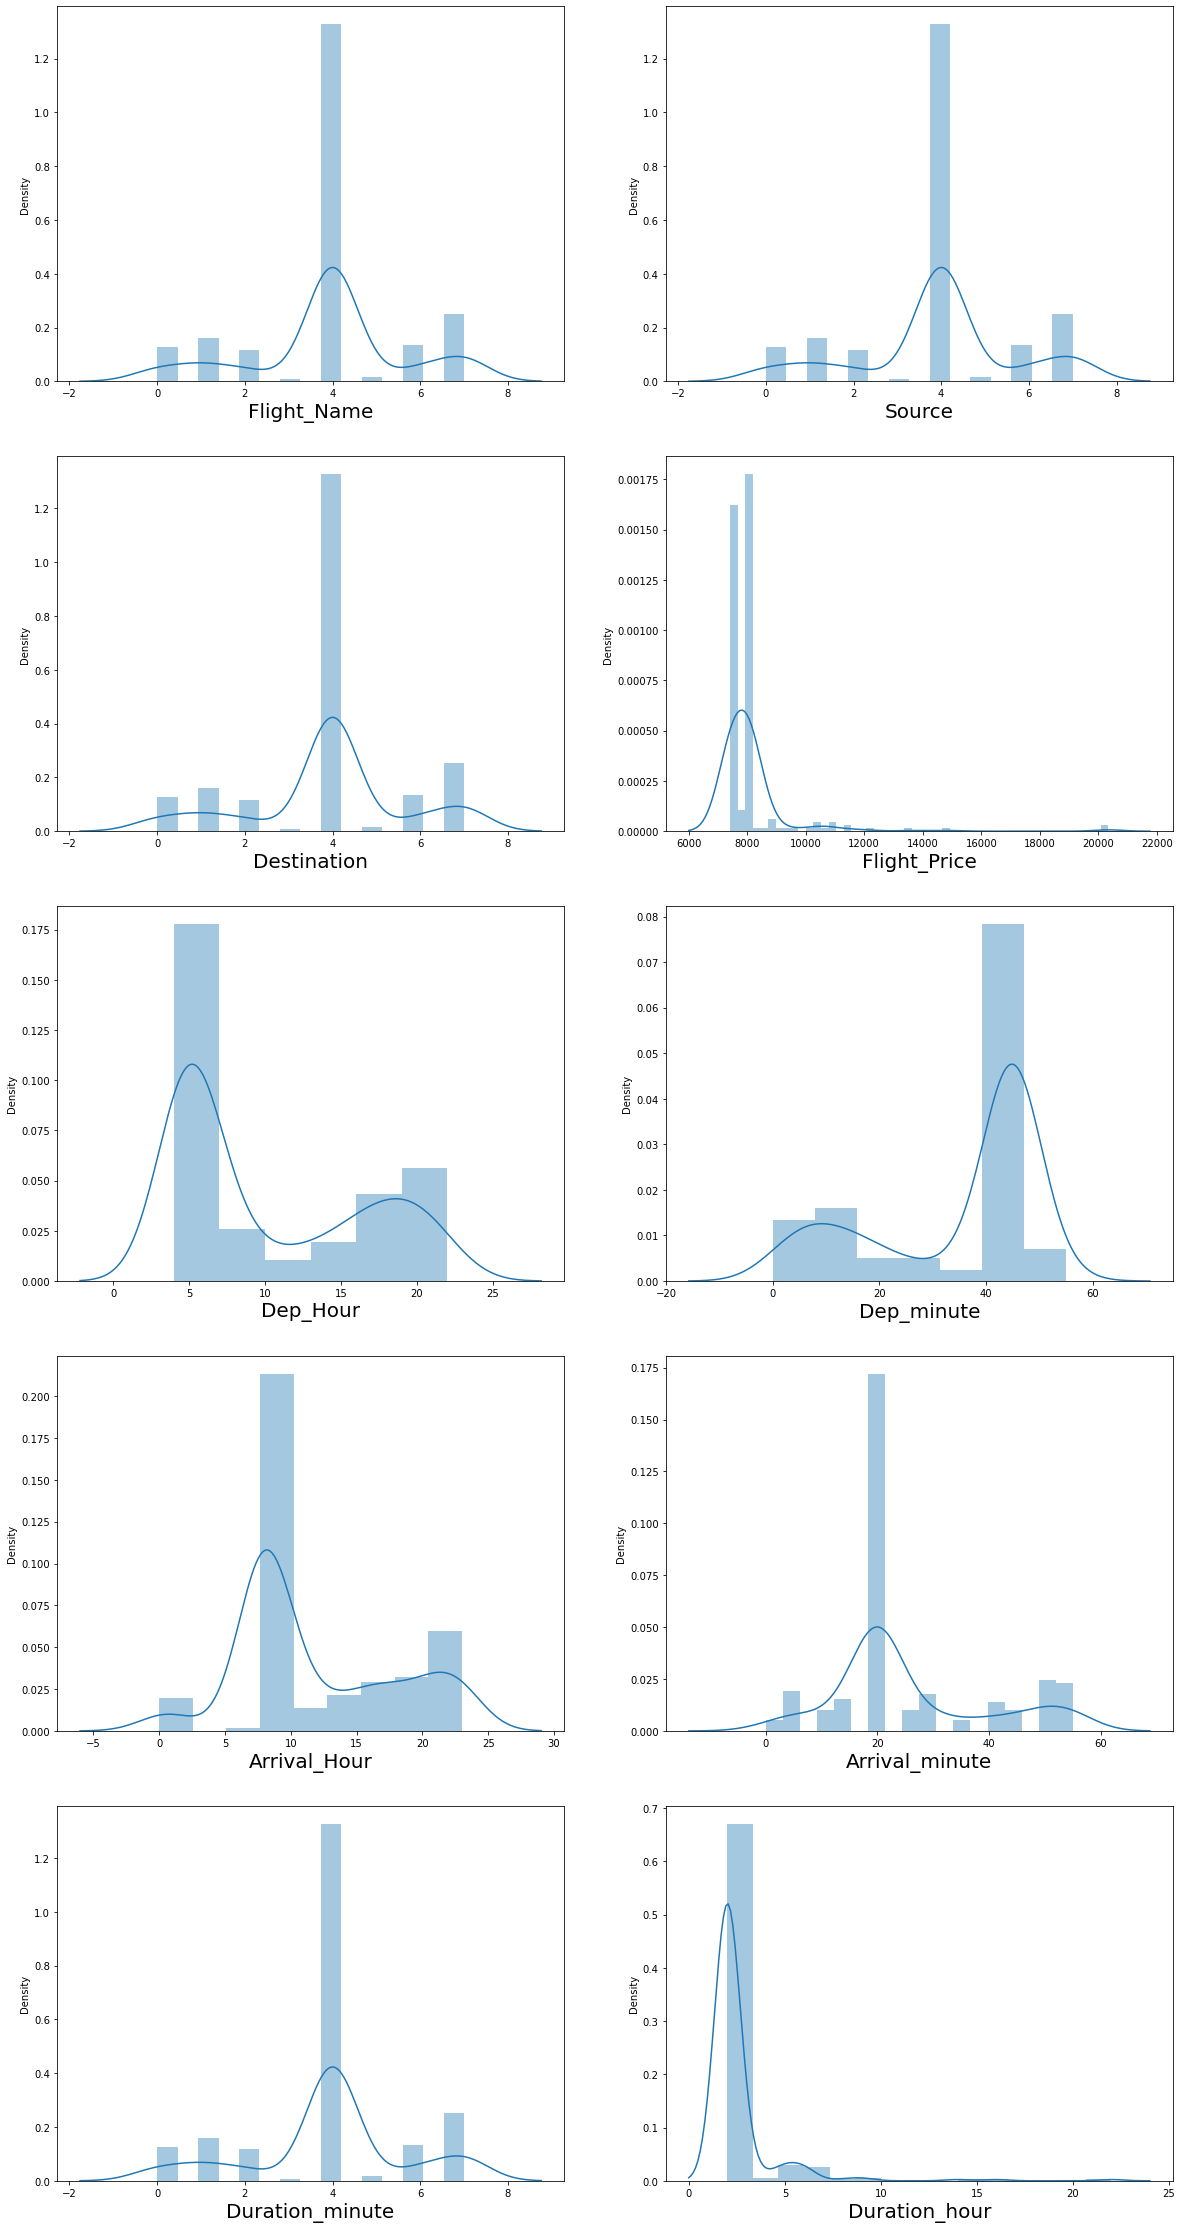

In [161]:
#lets plot data distribution 
plt.figure(figsize=(20,40))
plotnumber=1
for column in flight:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(flight[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()  

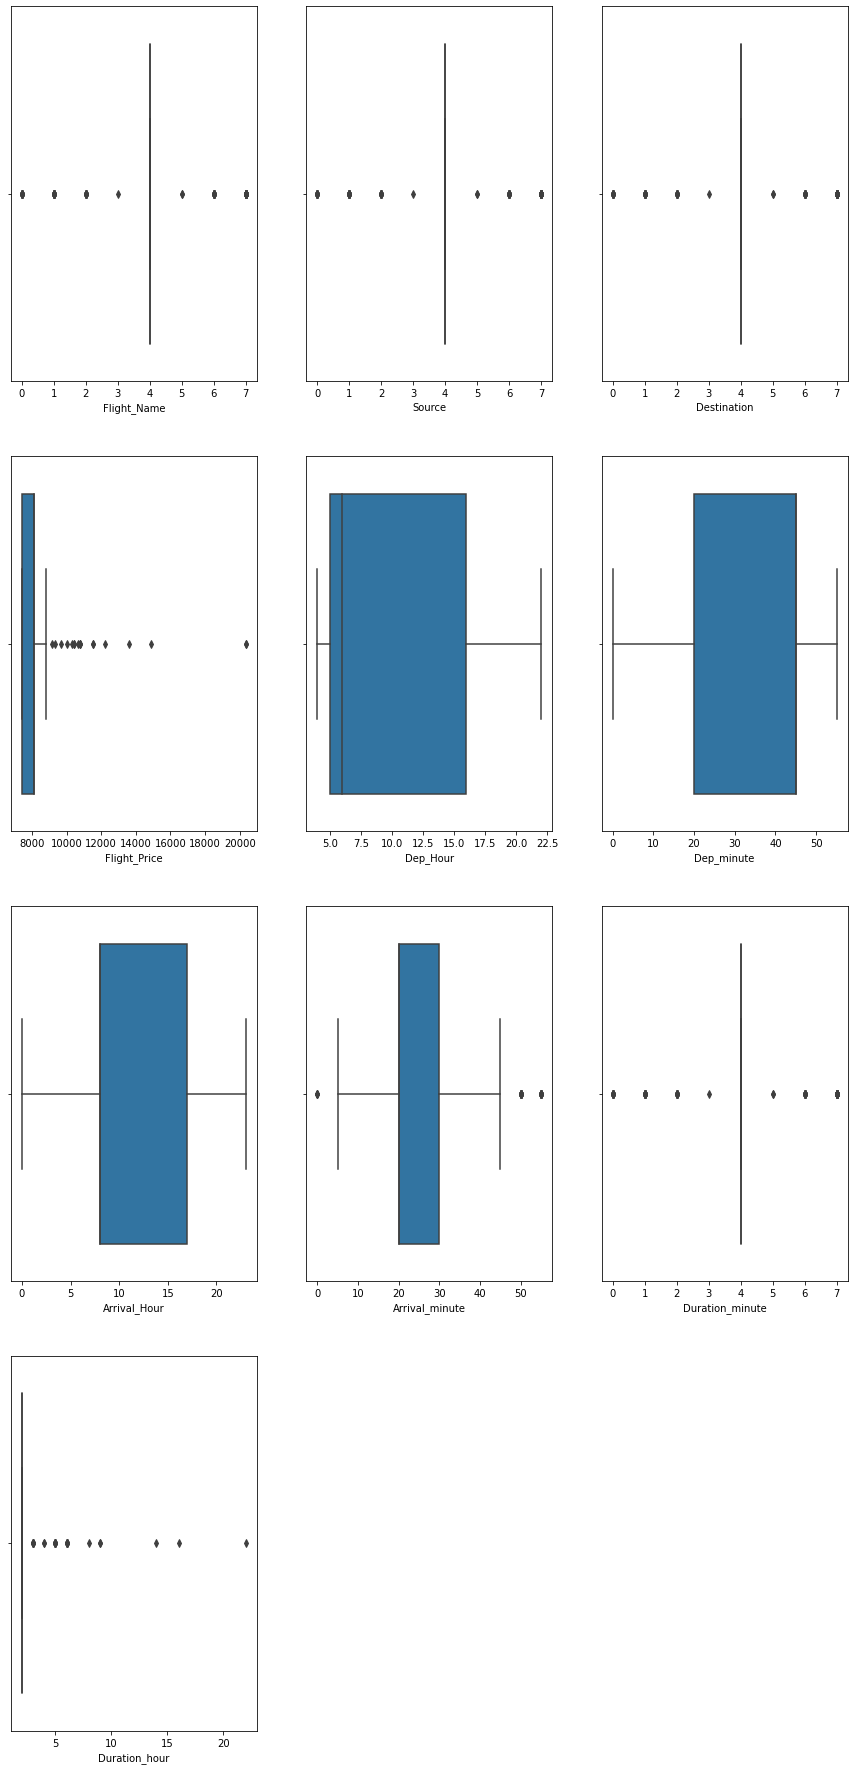

In [162]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,40))
graph=1
for column in flight:
    if graph<=10:
        ax=plt.subplot(5,3,graph)
        ax=sns.boxplot(flight[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()  

Flight Price Arrival Minute Duration minute ,Duration Hour all are having approx fixed time frame as data is particularly belongs to same route 

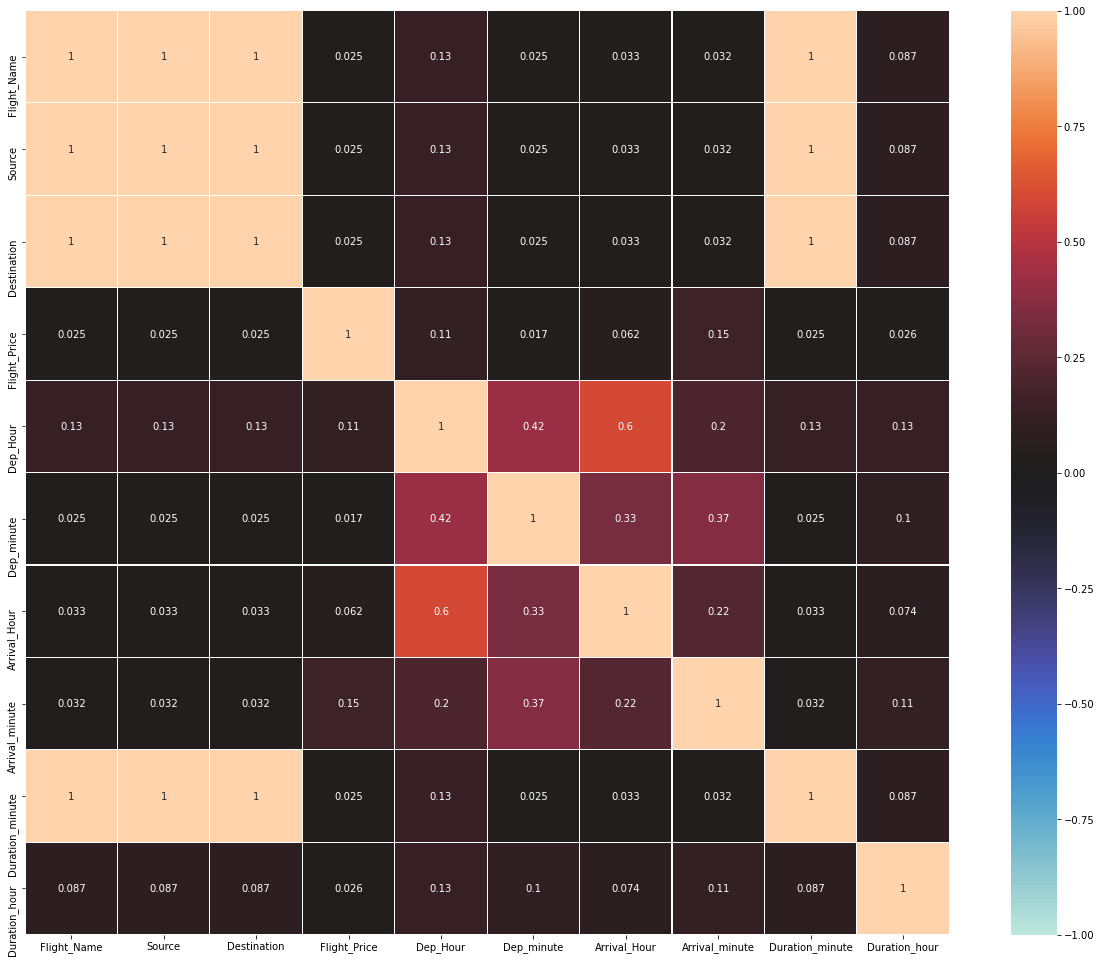

In [163]:
#Plotting Heatmap(Correlation matrix) to check multicollinearity between features
df_corr=flight.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='Dep_Hour', ylabel='Arrival_minute'>

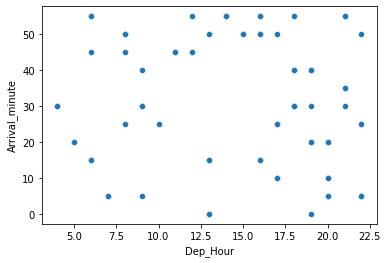

In [164]:
#scatter plot to check multicollinearity
sns.scatterplot(x='Dep_Hour',y='Arrival_minute',data=flight)

no rorrelation found 

<AxesSubplot:title={'center':'correlation with target'}>

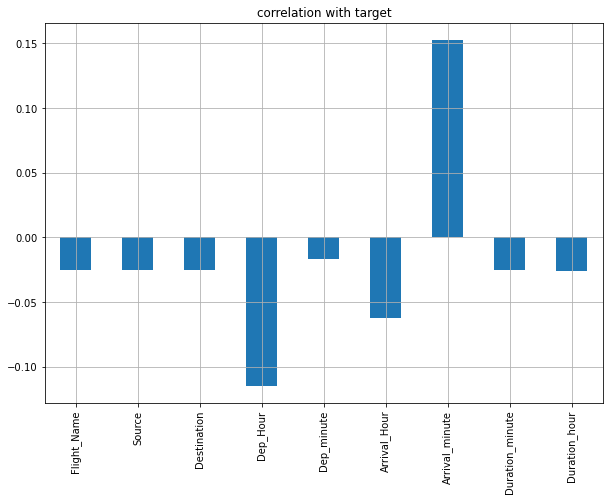

In [165]:
#take same data and visualize the correlation with class 
flight.drop('Flight_Price',axis=1).corrwith(flight.Flight_Price).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with target')

In [166]:
#check skewness indata set
flight.skew()

Flight_Name       -0.309883
Source            -0.309883
Destination       -0.309883
Flight_Price       5.938271
Dep_Hour           0.668391
Dep_minute        -0.983869
Arrival_Hour       0.503137
Arrival_minute     0.837580
Duration_minute   -0.309883
Duration_hour      5.931129
dtype: float64

In [167]:
#removing skewness with PowerTrasform
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
print(pt.fit(flight))

PowerTransformer()


# Features Selection

In [168]:
#seprate dataset into features and Class
X=flight.drop(columns='Flight_Price',axis=1)
Y=flight.Flight_Price

In [169]:
#Scale the feature data and train test split
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.25,random_state=12)

# Linear Regression 

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

In [172]:
y_pred=Lr.predict(x_test)

In [173]:
#train model score
Lr.score(x_train,y_train)

0.0452938860174279

In [174]:
#test model score
Lr.score(x_test,y_test)

-0.19159547915448605

In [175]:
#score is low so lets do regulrization of model with lasso 
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV 

In [176]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)  

LassoCV(max_iter=100, normalize=True)

In [177]:
alpha=lassocv.alpha_
alpha

18.026395497992908

In [178]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=18.026395497992908)

In [179]:
lasso_reg.score(x_train,y_train)

0.04454281019540085

No improvement after parameter tuning

In [180]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [181]:
ridgecv.alpha_

0.09099999999999998

In [182]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [183]:
ridge_model.score(x_train,y_train)

0.045293875085881674

No improvemnt after parameter tuning

# RandomForestRegression Model

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [186]:
y_pred=rfr.predict(x_train)

In [187]:
#train data model score
rfr.score(x_train,y_train)

0.5590696012711919

In [188]:
#test data model score
rfr.score(x_test,y_test)

-0.2943313693174352

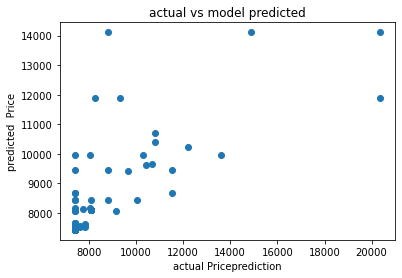

In [189]:
#scatter plot to see predict vs test data
plt.scatter(y_train,y_pred)
plt.xlabel('actual Priceprediction')
plt.ylabel('predicted  Price')
plt.title('actual vs model predicted')
plt.show()

In [190]:
#print r2_score
print(r2_score(y_train,y_pred))

0.5590696012711919


In [191]:
from sklearn.model_selection import cross_val_score

In [192]:
cross_val_score(rfr,X_scaler,Y,cv=5).mean()

-0.049424784943734125

# Hyperparameter Tuning

In [193]:
from sklearn.model_selection import RandomizedSearchCV

In [194]:
param_grid={'n_estimators':[100,130,150,170,180,200],
            'max_features':['auto','sqrt'],
            'max_depth':[5,8,10,12,14,16,18],
            'min_samples_split':[2,4,5,7,8,10,12],
            'min_samples_leaf':[1,2,4,6,10]}

In [195]:
grid_search=RandomizedSearchCV(rfr,param_distributions=param_grid,cv=5)

In [196]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 8, 10, 12, 14, 16, 18],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 10],
                                        'min_samples_split': [2, 4, 5, 7, 8, 10,
                                                              12],
                                        'n_estimators': [100, 130, 150, 170,
                                                         180, 200]})

In [197]:
#find best parameters
grid_search.best_params_

{'n_estimators': 180,
 'min_samples_split': 4,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 18}

In [198]:
#tune model with best parameters
rfr=RandomForestRegressor(n_estimators=100,min_samples_split=7,min_samples_leaf=10,max_features='sqrt',max_depth=10)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=7)

In [199]:
#train data score post tuning
rfr.score(x_train,y_train)

0.18619795360978586

In [200]:
#test data score post tuning
rfr.score(x_test,y_test)

-0.005238830208567968

Post tuning this modle is not accurate

In [201]:
y_pred=rfr.predict(x_test)

In [202]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
-0.005238830208567968


In [203]:
#mean absolute error and mean_squared_error
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))

MAE:  391.1576220751847
MSE:  371670.15769307443


# KNN Regression model

In [204]:
from sklearn.neighbors import KNeighborsRegressor

In [205]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [206]:
y_pred=knn.predict(x_test)

In [207]:
#Train data model score
knn.score(x_train,y_train)

0.3868956008227271

In [208]:
print(r2_score(y_test,y_pred))

-1.6548647274484263


In [209]:
#cross validation of knn model
cross_val_score(knn,X_scaler,Y,cv=5).mean()

-0.2876730860556914

Hyperparameter Tuning of knn model

In [210]:
param_grid={'n_neighbors':[5,7,9,11,13,15],
    'weights':['uniform'],
    'algorithm':['auto'],
    'leaf_size':[10,12,15,20,30],
    'p':[2,4,6,8,10]
    
}

In [211]:
grid_search=RandomizedSearchCV(knn,param_distributions=param_grid,cv=5)

In [212]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [10, 12, 15, 20, 30],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'p': [2, 4, 6, 8, 10],
                                        'weights': ['uniform']})

In [213]:
grid_search.best_params_

{'weights': 'uniform',
 'p': 6,
 'n_neighbors': 5,
 'leaf_size': 15,
 'algorithm': 'auto'}

In [214]:
#tune KNN with best parameters 
knn=KNeighborsRegressor(n_neighbors=7,weights='uniform',p=8,leaf_size=15,algorithm='auto')

In [215]:
#fit knn model with train data
knn.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=15, n_neighbors=7, p=8)

In [216]:
y_pred=knn.predict(x_test)

In [217]:
#post tuning model score
knn.score(x_train,y_train)

0.34117679566973735

In [218]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
-1.0288789731206887


In [219]:
#cross validation of KNN model
cross_val_score(knn,X_scaler,Y,cv=5).mean()

-0.06604680332841799

# Decesion Tree MOdel

In [220]:
from sklearn.tree import DecisionTreeRegressor

In [221]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [222]:
y_pred=dt.predict(x_test)

In [223]:
#model score
dt.score(x_train,y_train)

0.5791194518656477

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
parametrs={'criterion':['mse'],
    'max_depth':range(1,20,2),
    'min_samples_split':range(2,16, 2),
    'min_samples_leaf':range(1,10,1),
    'min_weight_fraction_leaf':[0.01,0.02,0.1,1]}

In [226]:
grid_search=GridSearchCV(estimator=dt,param_grid=parametrs,cv=5)

In [227]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 16, 2),
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.1, 1]})

In [228]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.01}

In [229]:
dt=DecisionTreeRegressor(criterion='mse',
                         max_depth=17,min_samples_leaf=3,min_samples_split=2,min_weight_fraction_leaf=0.01)

In [230]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=17, min_samples_leaf=3,
                      min_weight_fraction_leaf=0.01)

In [231]:
dt.score(x_train,y_train)

0.5246796412814219

In [232]:
y_pred=dt.predict(x_test)

In [233]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))   

**** accuracy post tuning****
-0.5890938102164802


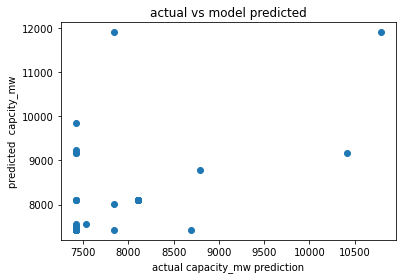

In [234]:
#Visualization of actual vs predicted capacity_mw
plt.scatter(y_test,y_pred)
plt.xlabel('actual capacity_mw prediction')
plt.ylabel('predicted  capcity_mw')
plt.title('actual vs model predicted')
plt.show()

model is not tune well not so accurate 

# XGB Model

In [235]:
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [236]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [237]:
xgb.score(x_train,y_train)

0.5791194518654672

In [238]:
y_pred=xgb.predict(x_test)
print(r2_score(y_test,y_pred))

-0.5191136686403646


Hyperparameter Tuning¶

In [239]:
grid_param={ 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':range(0,5,1),
'learning_rate':[0.01,0.02,.2,.3,.1]
}

In [240]:
grid_search=GridSearchCV(xgb,param_grid=grid_param,cv=5)

In [241]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [242]:
grid_search.best_params_

{'gamma': 0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1}

In [243]:
grid_search.best_score_

-1.4482044259661215

In [244]:
cross_val_score(xgb,X_scaler,Y,cv=5).mean()

-0.0993820894857677

# GradientBoost Regression model

In [245]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [246]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [247]:
#check model score
gbr.score(x_train,y_train)

0.5780131013869461

In [248]:
param={'loss':['ls'],
    'learning_rate':[0.1,0.2,0.3,0.4],
    'n_estimators':[100,150,200,250],
    'subsample':[1.0,2,3,4,7],
    'criterion':['friedman_mse']}

In [249]:
grid_search=GridSearchCV(estimator=gbr,param_grid=param,cv=5)

In [250]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4], 'loss': ['ls'],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [1.0, 2, 3, 4, 7]})

In [251]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'ls',
 'n_estimators': 100,
 'subsample': 1.0}

In [252]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='ls',n_estimators=100,subsample=1)

In [253]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(subsample=1)

In [254]:
gbr.score(x_train,y_train)

0.5780131013869461

In [255]:
y_pred=gbr.predict(x_train)

In [256]:
cross_val_score(gbr,X_scaler,Y,cv=5).mean()

0.0034004897382907016

low score but among all modle cross val score is positive so i will save this model

In [257]:
#saving model 
import pickle
filename='finalized_model.pickel'
pickle.dump(gbr, open(filename,'wb'))